In [1]:
"""
10) Create a Decision tree using ID3 algorithm using sklearn, 
and print the decision tree and confusion matrix for PIMA indian diabeties dataset
"""

'\nCreate a Decision tree using ID3 algorithm using sklearn, \nand print the decision tree and confusion matrix for PIMA indian diabeties dataset\n'

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [74]:
import pandas as pd
data=pd.read_excel('diabetes_0.xlsx')
#print(data)

In [75]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']
#print(x)
#print(y)

In [76]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
model=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3)

In [117]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [118]:
y_pred=model.predict(x_test)

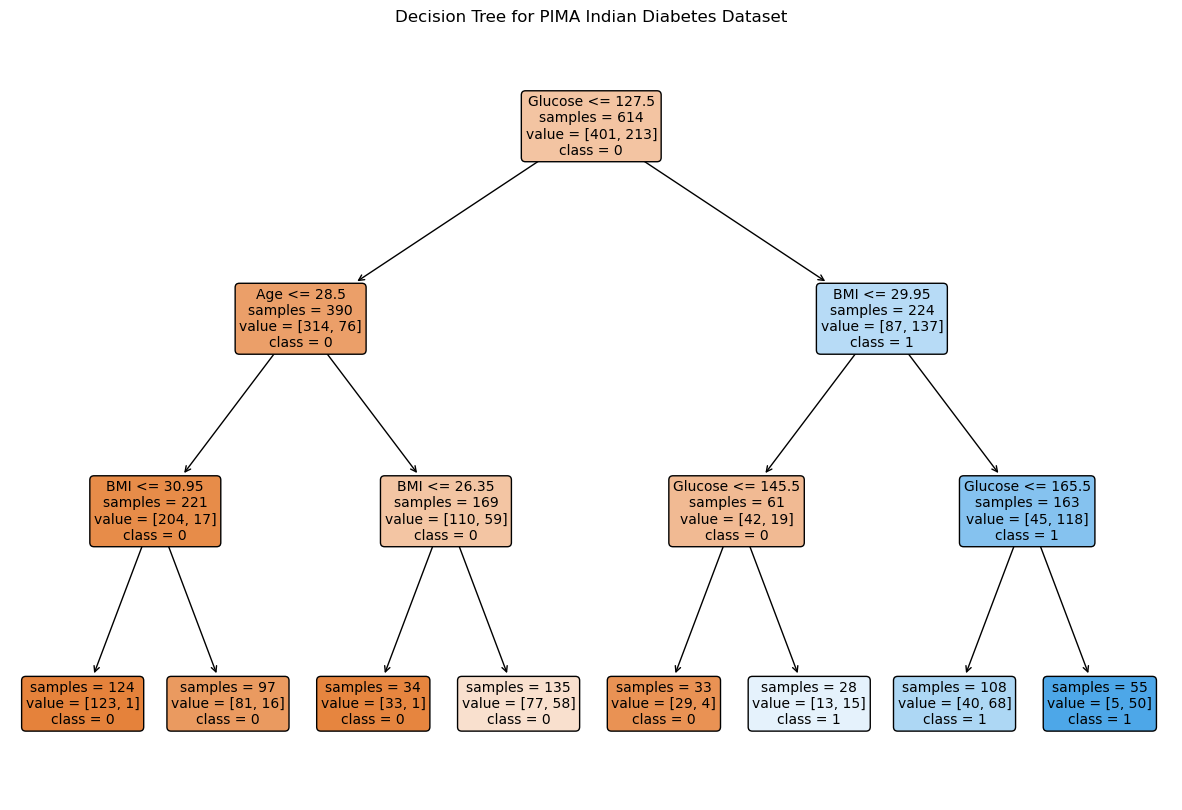

In [120]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True,
          feature_names=x.columns.tolist(),
          class_names=['0','1'],rounded=True,
          fontsize=10,impurity=False,
          proportion=False,
         )
plt.title("Decision Tree for PIMA Indian Diabetes Dataset")
plt.show()

In [121]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n"+str(cm))

print("\nClassification Report:\n"+str(classification_report(y_test,y_pred)))

Confusion Matrix: 
[[83 16]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [122]:
def entropy(y):
    class_counts=np.bincount(y)
    probabilities=class_counts/len(y)
    return -np.sum(probabilities*np.log2(probabilities+1e-9))
def information_gain(x,y,feature):
    total_entropy=entropy(y)
    unique_values=np.unique(x[feature])
    weighted_entropy=0
    for value in unique_values:
        subset=y[x[feature]==value]
        weighted_entropy+=len(subset)/len(y)*entropy(subset)
    return total_entropy-weighted_entropy
info_gains={feature:information_gain(x,y,feature)for feature in x.columns}

print("Information Gain: \n")
for feature,gain in info_gains.items():
    print(str(feature)+" : "+str(gain))

Information Gain: 

Pregnancies : 0.061825341672665624
Glucose : 0.3042011268246362
BloodPressure : 0.059309579607864094
SkinThickness : 0.08166434457222294
Insulin : 0.2770945283451114
BMI : 0.34381062662713957
DiabetesPedigreeFunction : 0.6509177473654072
Age : 0.14094080662466202


In [123]:
#2) Play Tennis or not:

    Outlook  Temperature  Humidity  Wind
0         1            1         0     1
1         1            1         0     0
2         0            1         0     1
3         2            2         0     1
4         2            0         1     1
5         2            0         1     0
6         0            0         1     0
7         1            2         0     1
8         1            0         1     1
9         2            2         1     1
10        1            2         1     0
11        0            2         0     0
12        0            1         1     1
13        2            2         0     0
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int32


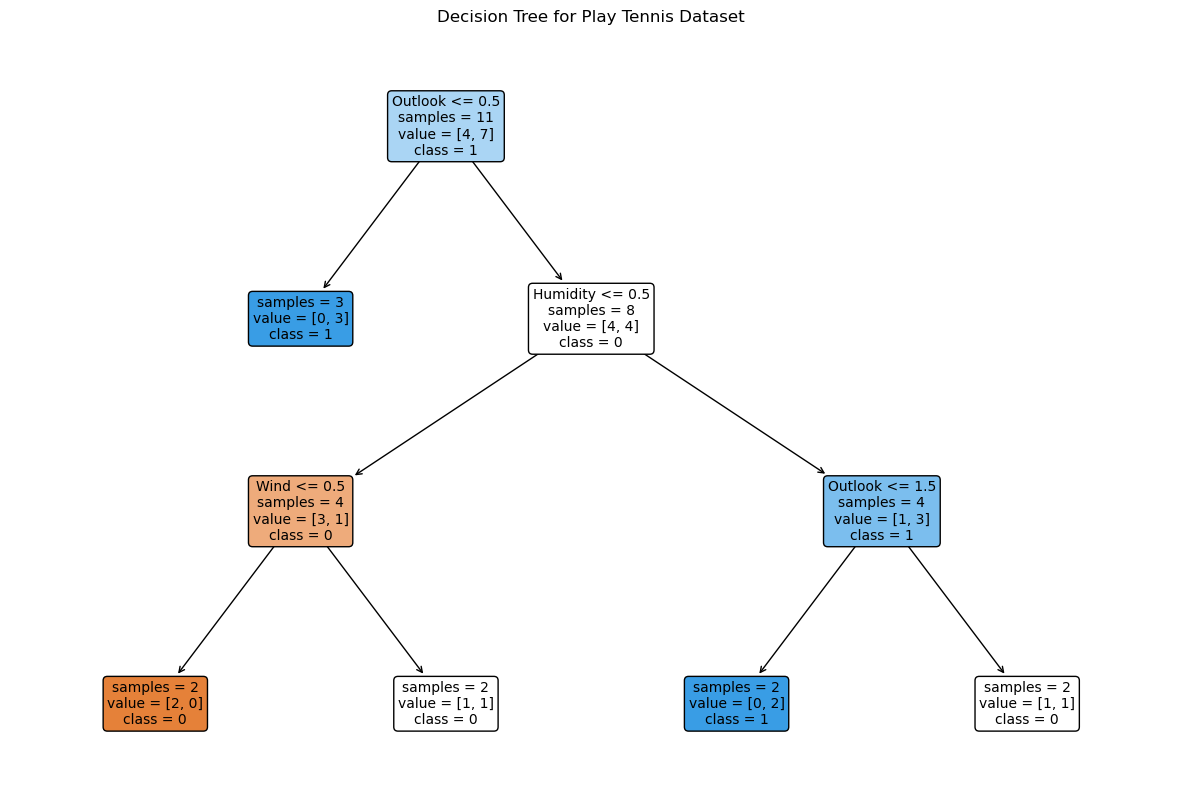

Confusion Matrix: 
[[1 0]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Information Gain: 

Outlook : 0.2467498193622405
Temperature : 0.029222565658954758
Humidity : 0.15183550136234159
Wind : 0.04812703040826949


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
data=pd.read_excel('tennis.xlsx')

label_encoder = LabelEncoder()
data['Outlook'] = label_encoder.fit_transform(data['Outlook'])
data['Temperature'] = label_encoder.fit_transform(data['Temperature'])
data['Humidity'] = label_encoder.fit_transform(data['Humidity'])
data['Wind'] = label_encoder.fit_transform(data['Wind'])
data['Play Tennis'] = label_encoder.fit_transform(data['Play Tennis'])

#print(data)
x=data.drop('Play Tennis',axis=1)
y=data['Play Tennis']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
plt.figure(figsize=(15,10))
plot_tree(model, filled=True,
          feature_names=x.columns.tolist(),
          class_names=['0','1'],rounded=True,
          fontsize=10,impurity=False,
          proportion=False,
         )
plt.title("Decision Tree for Play Tennis Dataset")
plt.show()
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n"+str(cm))

print("\nClassification Report:\n"+str(classification_report(y_test,y_pred)))

def entropy(y):
    class_counts=np.bincount(y)
    probabilities=class_counts/len(y)
    return -np.sum(probabilities*np.log2(probabilities+1e-9))
def information_gain(x,y,feature):
    total_entropy=entropy(y)
    unique_values=np.unique(x[feature])
    weighted_entropy=0
    for value in unique_values:
        subset=y[x[feature]==value]
        weighted_entropy+=len(subset)/len(y)*entropy(subset)
    return total_entropy-weighted_entropy
info_gains={feature:information_gain(x,y,feature)for feature in x.columns}

print("Information Gain: \n")
for feature,gain in info_gains.items():
    print(str(feature)+" : "+str(gain))
